<a href="https://colab.research.google.com/github/shambakey1/water_pollution/blob/main/ML_models_for_water_pollution_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Libraries loaded successfully!
✓ Directory structure created successfully!

LOADING DATA

✓ Data loaded successfully!
   Input Column: 'x'
   Number of Target Columns: 6
   Target Columns: ['P_u=5', 'P_u=7', 'P_u=9', 'X_u=5', 'X_u=7']...

DATA STATISTICS - BEFORE CLEANING

📊 Dataset Overview:
   Total Rows: 50,000
   Total Columns: 7
   Input Column: 'x'
   Target Columns: 6
   Memory Usage: 2.67 MB

🔍 Missing Values Analysis:
   Total Missing Values: 0
   Missing Data Percentage: 0.00%
   ✓ No missing values detected!

⚠️  Negative Values Analysis (Target Columns):
   ✓ No negative values detected!

📋 Data Types:
   float64: 7 columns

📈 Statistical Summary (Target Columns):
         count      mean       std       min       25%       50%       75%       max
P_u=5  50000.0  0.949028  0.297789  0.491375  0.643384  1.006880  1.260615  1.285957
P_u=7  50000.0  1.106593  0.233899  0.637285  0.918786  1.241612  1.295872  1.309386
P_u=9  50000.0  1.237472  0.125991  0.910149  1.211337  1.

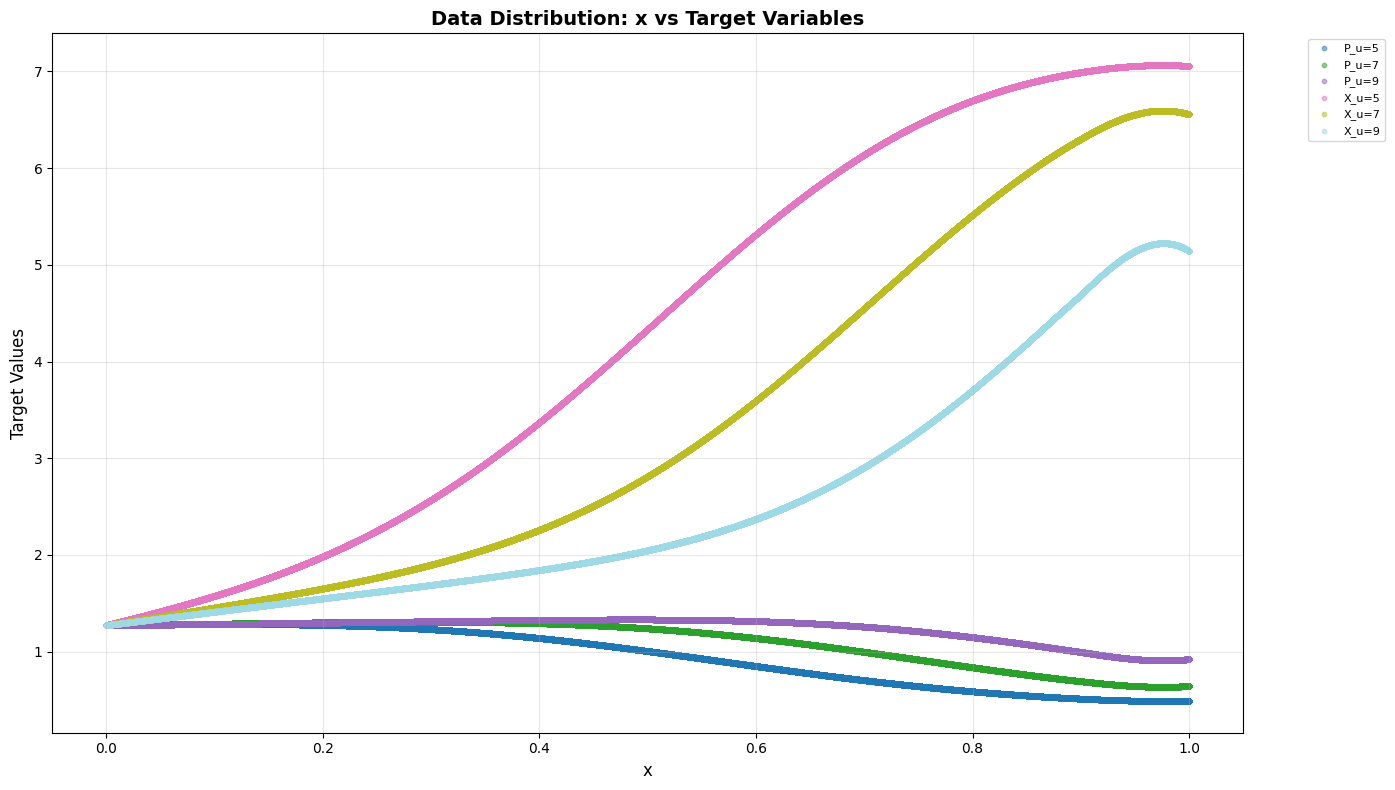

   ✓ Saved: results/visualizations/01_data_distribution.png

📦 Generating Box Plots...


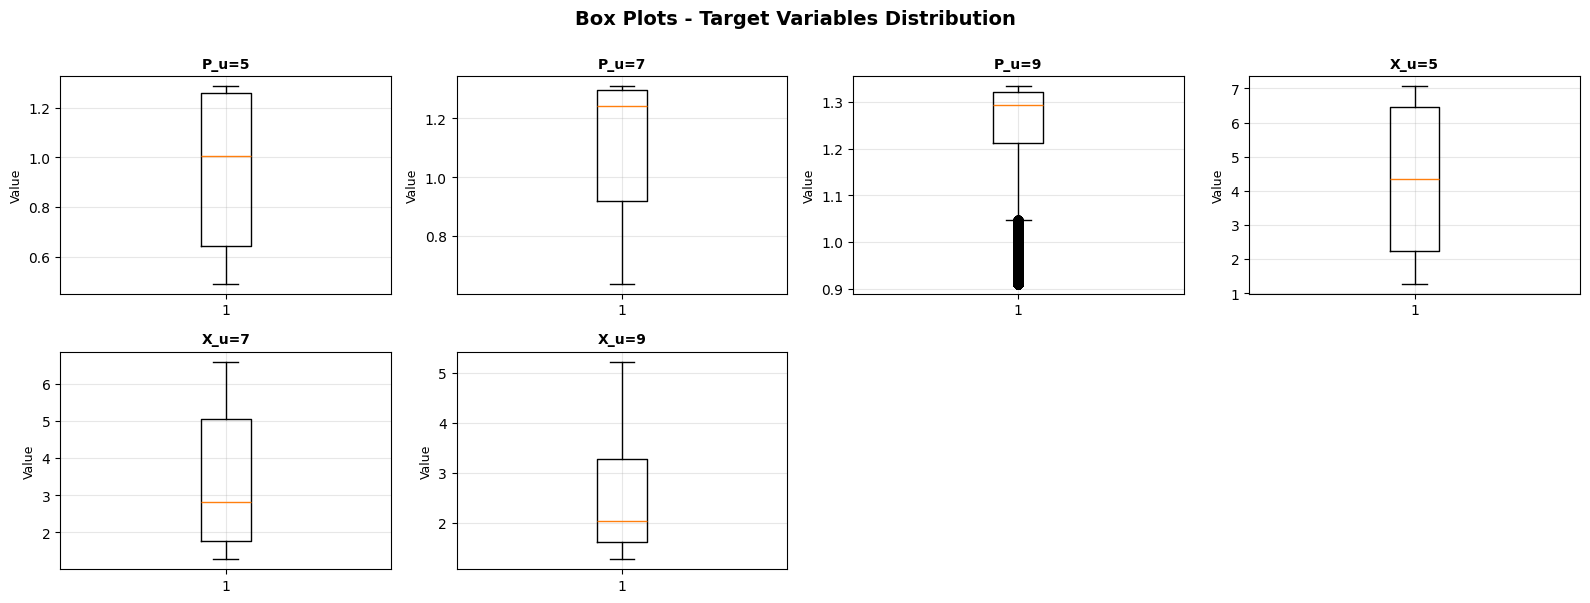

   ✓ Saved: results/visualizations/02_boxplots.png

📊 Generating Histograms with KDE...


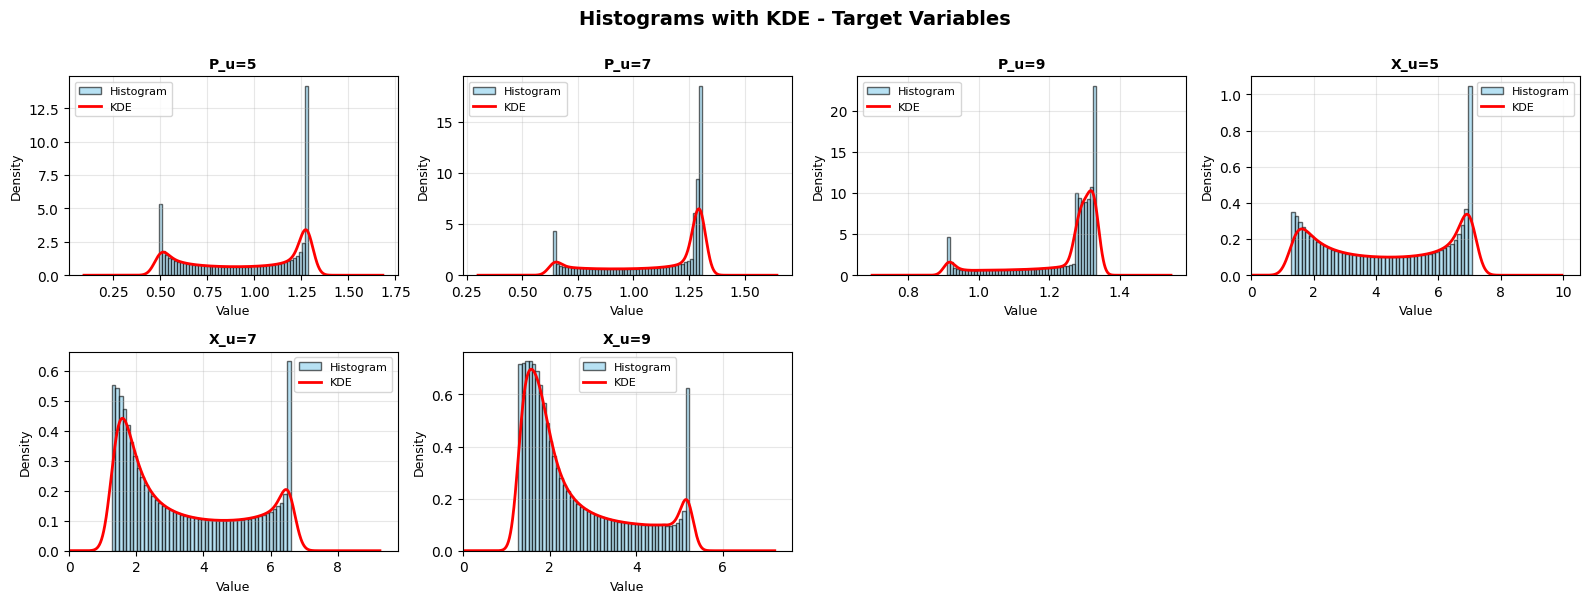

   ✓ Saved: results/visualizations/03_histograms_kde.png

🔗 Generating Correlation Matrix...


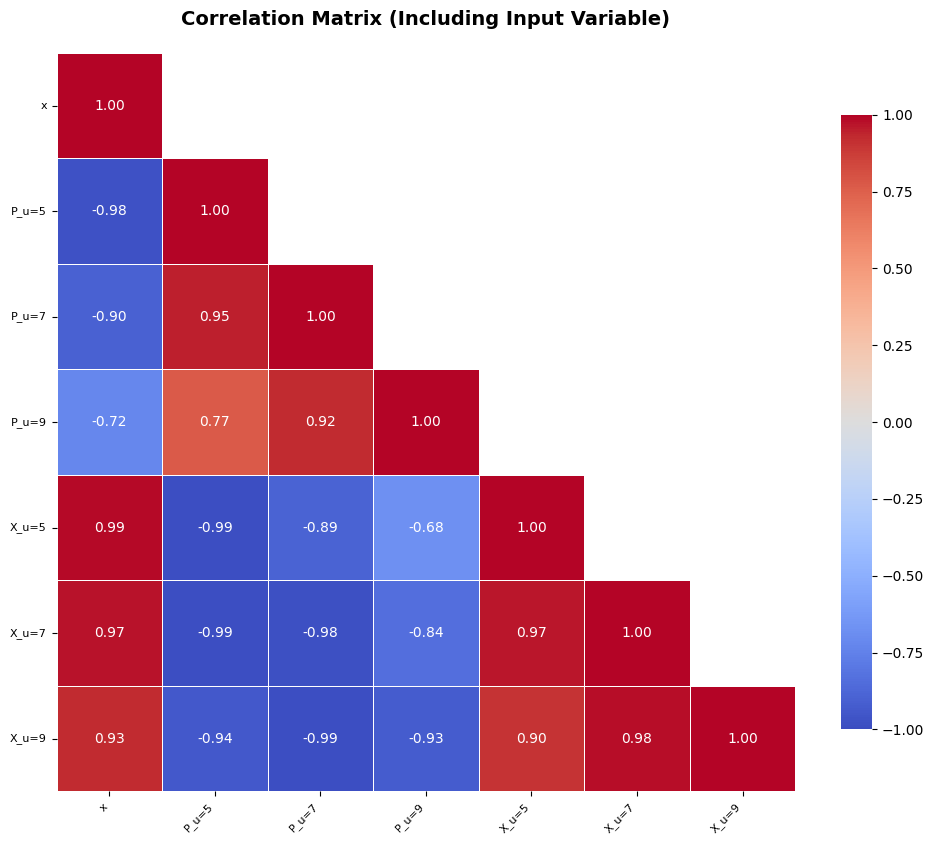

   ✓ Saved: results/visualizations/04_correlation_matrix.png

📋 Generating Statistical Summary Table...


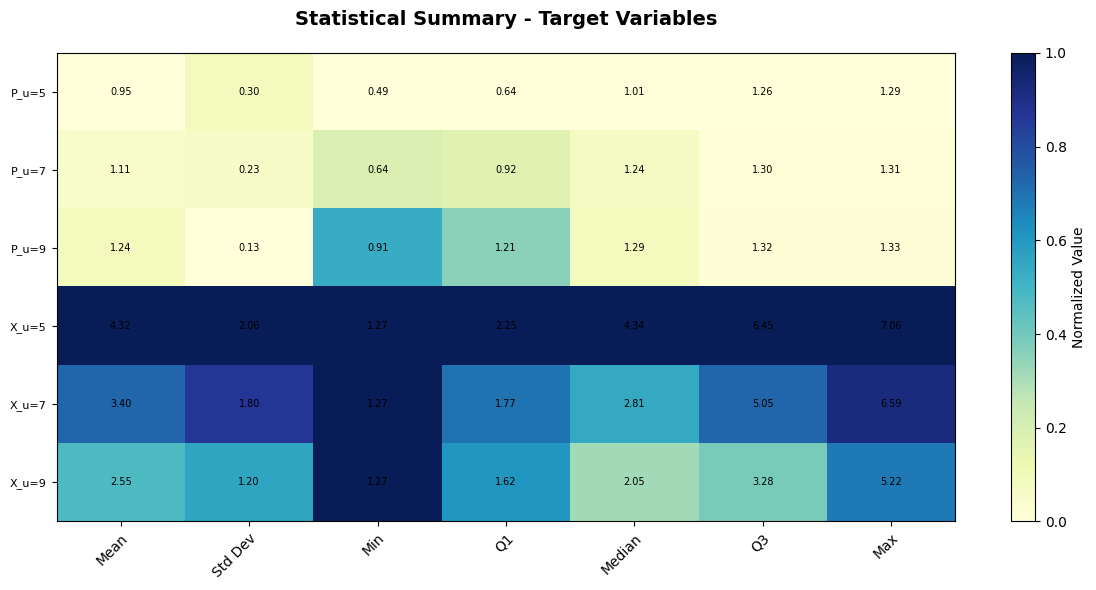

   ✓ Saved: results/visualizations/05_statistical_summary.png

EXPLORATORY ANALYSIS COMPLETE


PREPARING DATA FOR MODELING

✓ Saved X and y scalers

✓ Data split completed:
   Training set: 32,000 samples
   Validation set: 8,000 samples
   Test set: 10,000 samples

TRAINING TRADITIONAL ML MODELS

Training Linear Regression...
✓ Saved Linear Regression train predictions to results/predictions/Linear Regression_train_predictions.csv
✓ Saved Linear Regression val predictions to results/predictions/Linear Regression_val_predictions.csv
✓ Saved Linear Regression test predictions to results/predictions/Linear Regression_test_predictions.csv
✓ Saved Linear Regression to models/traditional/Linear Regression.pkl
✓ Linear Regression | Val R²=0.8474 | Test R²=0.8441

Training Random Forest...
✓ Saved Random Forest train predictions to results/predictions/Random Forest_train_predictions.csv
✓ Saved Random Forest val predictions to results/predictions/Random Forest_val_predictions.csv
✓ Saved Rand

In [ ]:
# -*- coding: utf-8 -*-
"""
Enhanced Machine Learning Pipeline with:
- Dynamic input column extraction
- Comprehensive data cleaning reports
- Improved visualization
"""

# ===========================================
# Import Libraries
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import json
import joblib
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Traditional ML models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping

print("✓ Libraries loaded successfully!")

# ===========================================
# Create directory structure for saving
# ===========================================
def create_directory_structure():
    """Create directories for saving models and results"""
    directories = [
        'models/traditional',
        'models/deep_learning',
        'models/hybrid',
        'results/predictions',
        'results/scalers',
        'results/visualizations'
    ]
    for directory in directories:
        os.makedirs(directory, exist_ok=True)
    print("✓ Directory structure created successfully!")

create_directory_structure()

# ===========================================
# Data Statistics and Cleaning Report Functions
# ===========================================

def print_data_statistics(df, target_cols, input_col, phase="BEFORE"):
    """
    Print comprehensive statistics about the dataset

    Parameters:
    - df: DataFrame to analyze
    - target_cols: List of target column names
    - input_col: Name of input column
    - phase: "BEFORE" or "AFTER" cleaning
    """
    print(f"\n{'='*80}")
    print(f"DATA STATISTICS - {phase} CLEANING")
    print(f"{'='*80}")

    # Basic info
    print(f"\n📊 Dataset Overview:")
    print(f"   Total Rows: {len(df):,}")
    print(f"   Total Columns: {len(df.columns)}")
    print(f"   Input Column: '{input_col}'")
    print(f"   Target Columns: {len(target_cols)}")
    print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Missing values
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    missing_pct = (total_missing / (len(df) * len(df.columns))) * 100

    print(f"\n🔍 Missing Values Analysis:")
    print(f"   Total Missing Values: {total_missing:,}")
    print(f"   Missing Data Percentage: {missing_pct:.2f}%")

    if total_missing > 0:
        print(f"\n   Missing Values per Column:")
        for col in df.columns:
            if missing_values[col] > 0:
                pct = (missing_values[col] / len(df)) * 100
                print(f"      {col}: {missing_values[col]:,} ({pct:.2f}%)")
    else:
        print(f"   ✓ No missing values detected!")

    # Negative values (only for target columns)
    if phase == "BEFORE":
        print(f"\n⚠️  Negative Values Analysis (Target Columns):")
        has_negative = False
        for col in target_cols:
            neg_count = (df[col] < 0).sum()
            if neg_count > 0:
                pct = (neg_count / len(df)) * 100
                print(f"      {col}: {neg_count:,} ({pct:.2f}%)")
                has_negative = True
        if not has_negative:
            print(f"   ✓ No negative values detected!")

    # Data types
    print(f"\n📋 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count} columns")

    # Basic statistics for target columns
    print(f"\n📈 Statistical Summary (Target Columns):")
    stats_df = df[target_cols].describe().T
    print(stats_df.to_string())


def print_cleaning_summary(df_before, df_after, target_cols, input_col):
    """
    Print a comprehensive summary comparing before and after cleaning

    Parameters:
    - df_before: DataFrame before cleaning
    - df_after: DataFrame after cleaning
    - target_cols: List of target column names
    - input_col: Name of input column
    """
    print(f"\n{'='*80}")
    print("DATA CLEANING SUMMARY")
    print(f"{'='*80}")

    # Calculate metrics
    rows_before = len(df_before)
    rows_after = len(df_after)
    rows_removed = rows_before - rows_after
    retention_rate = (rows_after / rows_before) * 100

    missing_before = df_before.isnull().sum().sum()
    missing_after = df_after.isnull().sum().sum()

    # Count negative values before
    neg_before = sum((df_before[col] < 0).sum() for col in target_cols)
    neg_after = sum((df_after[col] < 0).sum() for col in target_cols)

    # Create summary table
    print(f"\n{'Metric':<30} {'Before':<15} {'After':<15} {'Change':<15}")
    print(f"{'-'*75}")
    print(f"{'Total Rows':<30} {rows_before:,<15} {rows_after:,<15} {-rows_removed:,<15}")
    print(f"{'Missing Values':<30} {missing_before:,<15} {missing_after:,<15} {missing_after - missing_before:,<15}")
    print(f"{'Negative Values (targets)':<30} {neg_before:,<15} {neg_after:,<15} {neg_after - neg_before:,<15}")
    print(f"{'Data Completeness (%)':<30} {100.0:<15.2f} {100.0:<15.2f} {'0.00':<15}")
    print(f"{'Data Retention (%)':<30} {'-':<15} {retention_rate:<15.2f} {'-':<15}")

    print(f"\n✓ Cleaning Complete!")
    print(f"   • Removed {rows_removed:,} rows ({100-retention_rate:.2f}% of data)")
    print(f"   • Retained {rows_after:,} rows ({retention_rate:.2f}% of data)")
    print(f"   • Eliminated all missing values and negative target values")


# ===========================================
# Enhanced Exploratory Analysis Function
# ===========================================

def exploratory_analysis(df_clean, target_cols, input_col):
    """
    Comprehensive exploratory data analysis with multiple visualizations

    Parameters:
    - df_clean: Cleaned DataFrame
    - target_cols: List of target column names
    - input_col: Name of input column
    """
    print(f"\n{'='*80}")
    print("EXPLORATORY DATA ANALYSIS")
    print(f"{'='*80}\n")

    n_targets = len(target_cols)

    # ===========================================
    # 1. DATA DISTRIBUTION PLOT (Input vs Targets)
    # ===========================================
    print("📊 Generating Data Distribution Plot...")
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create color palette
    colors = plt.cm.tab20(np.linspace(0, 1, n_targets))

    for idx, col in enumerate(target_cols):
        ax.scatter(df_clean[input_col], df_clean[col],
                  alpha=0.5, s=10, color=colors[idx], label=col)

    ax.set_title(f"Data Distribution: {input_col} vs Target Variables", fontsize=14, fontweight='bold')
    ax.set_xlabel(input_col, fontsize=12)
    ax.set_ylabel("Target Values", fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('results/visualizations/01_data_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   ✓ Saved: results/visualizations/01_data_distribution.png\n")

    # ===========================================
    # 2. BOX PLOTS
    # ===========================================
    print("📦 Generating Box Plots...")
    n_cols = min(4, n_targets)
    n_rows = (n_targets + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
    if n_targets == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(target_cols):
        axes[idx].boxplot(df_clean[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Value', fontsize=9)
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(n_targets, len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Box Plots - Target Variables Distribution', fontsize=14, fontweight='bold', y=0.998)
    plt.tight_layout()
    plt.savefig('results/visualizations/02_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   ✓ Saved: results/visualizations/02_boxplots.png\n")

    # ===========================================
    # 3. HISTOGRAMS WITH KDE
    # ===========================================
    print("📊 Generating Histograms with KDE...")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
    if n_targets == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(target_cols):
        col_data = df_clean[col].dropna()

        # Histogram
        axes[idx].hist(col_data, bins=50, alpha=0.6, color='skyblue',
                      edgecolor='black', density=True, label='Histogram')

        # KDE overlay
        try:
            col_data.plot(kind='kde', ax=axes[idx], color='red',
                         linewidth=2, label='KDE')
        except:
            pass

        # Set x-axis to start from 0
        current_xlim = axes[idx].get_xlim()
        axes[idx].set_xlim(left=max(0, current_xlim[0]), right=current_xlim[1])

        axes[idx].set_title(col, fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Value', fontsize=9)
        axes[idx].set_ylabel('Density', fontsize=9)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(n_targets, len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Histograms with KDE - Target Variables', fontsize=14, fontweight='bold', y=0.998)
    plt.tight_layout()
    plt.savefig('results/visualizations/03_histograms_kde.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   ✓ Saved: results/visualizations/03_histograms_kde.png\n")

    # ===========================================
    # 4. CORRELATION MATRIX
    # ===========================================
    print("🔗 Generating Correlation Matrix...")
    corr_matrix = df_clean.corr()

    # Determine figure size
    fig_size = max(10, min(20, len(corr_matrix.columns) * 0.8))
    plt.figure(figsize=(fig_size, fig_size * 0.85))

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

    # Adjust annotation font size
    annot_size = max(6, min(10, 100 // len(corr_matrix.columns)))

    sns.heatmap(corr_matrix,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8},
                mask=mask,
                vmin=-1, vmax=1,
                annot_kws={'fontsize': annot_size})

    plt.title('Correlation Matrix (Including Input Variable)', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.savefig('results/visualizations/04_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   ✓ Saved: results/visualizations/04_correlation_matrix.png\n")

    # ===========================================
    # 5. STATISTICAL SUMMARY TABLE
    # ===========================================
    print("📋 Generating Statistical Summary Table...")
    stats = df_clean[target_cols].describe().T
    stats['Q1'] = df_clean[target_cols].quantile(0.25)
    stats['Q3'] = df_clean[target_cols].quantile(0.75)
    stats = stats[['mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max']]
    stats.columns = ['Mean', 'Std Dev', 'Min', 'Q1', 'Median', 'Q3', 'Max']

    # Create heatmap of statistics
    fig, ax = plt.subplots(figsize=(12, max(6, n_targets * 0.4)))

    # Normalize data for heatmap
    stats_normalized = (stats - stats.min()) / (stats.max() - stats.min())

    im = ax.imshow(stats_normalized.values, cmap='YlGnBu', aspect='auto')

    # Set ticks
    ax.set_xticks(np.arange(len(stats.columns)))
    ax.set_yticks(np.arange(len(stats.index)))
    ax.set_xticklabels(stats.columns, fontsize=10)
    ax.set_yticklabels(stats.index, fontsize=8)

    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text annotations
    for i in range(len(stats.index)):
        for j in range(len(stats.columns)):
            text = ax.text(j, i, f'{stats.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=7)

    ax.set_title("Statistical Summary - Target Variables", fontsize=14, fontweight='bold', pad=20)
    plt.colorbar(im, ax=ax, label='Normalized Value')
    plt.tight_layout()
    plt.savefig('results/visualizations/05_statistical_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   ✓ Saved: results/visualizations/05_statistical_summary.png\n")

    print(f"{'='*80}")
    print("EXPLORATORY ANALYSIS COMPLETE")
    print(f"{'='*80}\n")


# ===========================================
# Helper Functions for Saving/Loading
# ===========================================

def save_traditional_model(model, model_name, metrics, train_time, pred_time):
    """Save traditional ML model with metadata"""
    try:
        model_path = f'models/traditional/{model_name}.pkl'
        joblib.dump(model, model_path)

        metadata = {
            'model_name': model_name,
            'train_time': train_time,
            'pred_time': pred_time,
            'metrics': metrics
        }
        metadata_path = f'models/traditional/{model_name}_metadata.json'
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=4)

        print(f"✓ Saved {model_name} to {model_path}")
    except Exception as e:
        print(f"✗ Error saving {model_name}: {e}")


def save_deep_model(model, model_name, history, metrics, train_time, pred_time):
    """Save deep learning model with history and metadata"""
    try:
        model_path = f'models/deep_learning/{model_name}.keras'
        model.save(model_path)

        history_path = f'models/deep_learning/{model_name}_history.json'
        history_dict = {key: [float(val) for val in values]
                       for key, values in history.history.items()}
        with open(history_path, 'w') as f:
            json.dump(history_dict, f, indent=4)

        metadata = {
            'model_name': model_name,
            'train_time': train_time,
            'pred_time': pred_time,
            'metrics': metrics,
            'epochs_trained': len(history.history['loss'])
        }
        metadata_path = f'models/deep_learning/{model_name}_metadata.json'
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=4)

        print(f"✓ Saved {model_name} to {model_path}")
    except Exception as e:
        print(f"✗ Error saving {model_name}: {e}")


def save_hybrid_model(rf, mlp, scaler_res, metrics, train_time, pred_time):
    """Save hybrid model components"""
    try:
        rf_path = 'models/hybrid/rf_component.pkl'
        joblib.dump(rf, rf_path)

        mlp_path = 'models/hybrid/mlp_component.pkl'
        joblib.dump(mlp, mlp_path)

        scaler_path = 'models/hybrid/scaler_res.pkl'
        joblib.dump(scaler_res, scaler_path)

        config = {
            'model_name': 'Hybrid RF + MLP (Residual)',
            'architecture': {
                'rf': 'RandomForestRegressor(n_estimators=100)',
                'mlp': 'MLPRegressor(hidden_layers=(64,32), max_iter=1000)'
            },
            'train_time': train_time,
            'pred_time': pred_time,
            'metrics': metrics
        }
        config_path = 'models/hybrid/config.json'
        with open(config_path, 'w') as f:
            json.dump(config, f, indent=4)

        print(f"✓ Saved Hybrid model components to models/hybrid/")
    except Exception as e:
        print(f"✗ Error saving Hybrid model: {e}")


def save_predictions(input_values, y_true, y_pred, model_name, phase, input_col):
    """Save predictions to CSV file with dynamic input column name"""
    try:
        # Create DataFrame with dynamic input column name
        data = {input_col: input_values.flatten()}

        # Add true values
        for i in range(y_true.shape[1]):
            data[f'y_true_C{i+1}'] = y_true[:, i]

        # Add predicted values
        for i in range(y_pred.shape[1]):
            data[f'y_pred_C{i+1}'] = y_pred[:, i]

        df = pd.DataFrame(data)

        # Save to CSV
        filename = f'results/predictions/{model_name}_{phase}_predictions.csv'
        df.to_csv(filename, index=False)

        print(f"✓ Saved {model_name} {phase} predictions to {filename}")
    except Exception as e:
        print(f"✗ Error saving {model_name} {phase} predictions: {e}")


# =========================
# Read Data with Dynamic Input Column Extraction
# =========================
print(f"\n{'='*80}")
print("LOADING DATA")
print(f"{'='*80}\n")

df = pd.read_csv("PX_vs_x_50000pts_dx0p05_processed.csv")

# DYNAMIC INPUT COLUMN EXTRACTION
input_col = df.columns[0]  # Extract first column name
target_cols = df.columns[1:]  # Remaining columns are targets

print(f"✓ Data loaded successfully!")
print(f"   Input Column: '{input_col}'")
print(f"   Number of Target Columns: {len(target_cols)}")
print(f"   Target Columns: {list(target_cols)[:5]}..." if len(target_cols) > 5 else f"   Target Columns: {list(target_cols)}")

# =========================
# Data Quality Check - BEFORE CLEANING
# =========================
df_before = df.copy()  # Keep copy for comparison
print_data_statistics(df_before, target_cols, input_col, phase="BEFORE")

# =========================
# Data Cleaning
# =========================
def clean_data(df, target_cols):
    """Clean data by removing missing values and negative target values"""
    df_clean = df.copy()

    # Remove rows with missing values
    df_clean = df_clean.dropna(subset=target_cols)

    # Remove rows with negative values in target columns
    for col in target_cols:
        df_clean = df_clean[df_clean[col] >= 0]

    return df_clean

print(f"\n{'='*80}")
print("CLEANING DATA")
print(f"{'='*80}\n")

df_clean = clean_data(df, target_cols)

# =========================
# Data Quality Check - AFTER CLEANING
# =========================
print_data_statistics(df_clean, target_cols, input_col, phase="AFTER")

# =========================
# Cleaning Summary Report
# =========================
print_cleaning_summary(df_before, df_clean, target_cols, input_col)

# =========================
# Exploratory Analysis with Enhanced Visualizations
# =========================
exploratory_analysis(df_clean, target_cols, input_col)

# =========================
# Prepare X and y
# =========================
print(f"\n{'='*80}")
print("PREPARING DATA FOR MODELING")
print(f"{'='*80}\n")

X = df_clean[[input_col]].values
y = df_clean[target_cols].values

if np.isnan(y).sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    y = imputer.fit_transform(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Save scalers
joblib.dump(scaler_X, 'results/scalers/scaler_X.pkl')
joblib.dump(scaler_y, 'results/scalers/scaler_y.pkl')
print("✓ Saved X and y scalers")

# Train/Validation split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train_scaled,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("\n✓ Data split completed:")
print(f"   Training set: {X_train_final.shape[0]:,} samples")
print(f"   Validation set: {X_val.shape[0]:,} samples")
print(f"   Test set: {X_test_scaled.shape[0]:,} samples")

# =========================
# Define Metrics
# =========================
def correlation_coefficient(y_true, y_pred):
    return np.corrcoef(y_true.flatten(), y_pred.flatten())[0, 1]

def scatter_index(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mean_true = np.mean(y_true)
    return rmse / mean_true

def willmott_index(y_true, y_pred):
    mean_true = np.mean(y_true)
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((np.abs(y_pred - mean_true) + np.abs(y_true - mean_true))**2)
    return 1 - numerator / denominator

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    cc = correlation_coefficient(y_true, y_pred)
    si = scatter_index(y_true, y_pred)
    wi = willmott_index(y_true, y_pred)

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "CC": cc,
        "SI": si,
        "WI": wi
    }

# =========================
# Traditional ML Models
# =========================
print(f"\n{'='*80}")
print("TRAINING TRADITIONAL ML MODELS")
print(f"{'='*80}\n")

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM (RBF Kernel)": SVR(kernel='rbf', C=10),
    "Linear SVM": LinearSVR(random_state=42, max_iter=5000),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,100,50), max_iter=2000, random_state=42),
}

results = []
single_output_models_names = ["Gradient Boosting", "SVM (RBF Kernel)", "Linear SVM"]

for name, model in models.items():
    print(f"Training {name}...")
    start_train = time.time()

    current_model = model
    if name in single_output_models_names:
        current_model = MultiOutputRegressor(model)

    current_model.fit(X_train_final, y_train_final)
    train_time = time.time() - start_train

    start_pred = time.time()

    # Predict on training data
    y_train_pred = current_model.predict(X_train_final)

    # Predict on validation
    y_val_pred = current_model.predict(X_val)

    # Predict on test
    y_test_pred = current_model.predict(X_test_scaled)
    pred_time = time.time() - start_pred

    # Inverse transform
    y_train_true = scaler_y.inverse_transform(y_train_final)
    y_train_pred = scaler_y.inverse_transform(y_train_pred)

    y_val_true = scaler_y.inverse_transform(y_val)
    y_val_pred = scaler_y.inverse_transform(y_val_pred)

    y_test_true = scaler_y.inverse_transform(y_test_scaled)
    y_test_pred = scaler_y.inverse_transform(y_test_pred)

    # Evaluate
    train_metrics = evaluate_model(y_train_true, y_train_pred)
    val_metrics = evaluate_model(y_val_true, y_val_pred)
    test_metrics = evaluate_model(y_test_true, y_test_pred)

    # Save predictions for all phases with dynamic input column
    X_train_original = scaler_X.inverse_transform(X_train_final)
    X_val_original = scaler_X.inverse_transform(X_val)
    X_test_original = scaler_X.inverse_transform(X_test_scaled)

    save_predictions(X_train_original, y_train_true, y_train_pred, name, 'train', input_col)
    save_predictions(X_val_original, y_val_true, y_val_pred, name, 'val', input_col)
    save_predictions(X_test_original, y_test_true, y_test_pred, name, 'test', input_col)

    # Save model
    save_traditional_model(current_model, name,
                          {'train': train_metrics, 'val': val_metrics, 'test': test_metrics},
                          train_time, pred_time)

    results.append({
        "Model": name,
        "Validation MSE": val_metrics["MSE"],
        "Validation MAE": val_metrics["MAE"],
        "Validation RMSE": val_metrics["RMSE"],
        "Validation R²": val_metrics["R²"],
        "Validation CC": val_metrics["CC"],
        "Validation SI": val_metrics["SI"],
        "Validation WI": val_metrics["WI"],
        "Test MSE": test_metrics["MSE"],
        "Test MAE": test_metrics["MAE"],
        "Test RMSE": test_metrics["RMSE"],
        "Test R²": test_metrics["R²"],
        "Test CC": test_metrics["CC"],
        "Test SI": test_metrics["SI"],
        "Test WI": test_metrics["WI"],
        "Train Time": train_time,
        "Pred Time": pred_time
    })

    print(f"✓ {name} | Val R²={val_metrics['R²']:.4f} | Test R²={test_metrics['R²']:.4f}\n")

# =========================
# Results DataFrame for Traditional Models
# =========================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test R²", ascending=False)
print("\n" + "="*80)
print("TRADITIONAL MODELS COMPARISON")
print("="*80 + "\n")
print(results_df.to_string(index=False))

# Save comparison table
results_df.to_csv('results/comparison_traditional.csv', index=False)
print("\n✓ Saved traditional models comparison to results/comparison_traditional.csv")

# =========================
# Deep Learning Models Preparation
# =========================
print(f"\n{'='*80}")
print("PREPARING DEEP LEARNING MODELS")
print(f"{'='*80}\n")

X_train_dl = X_train_final.reshape((X_train_final.shape[0], 1, X_train_final.shape[1]))
X_val_dl = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_dl = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

n_outputs = y_train_final.shape[1]

es = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

results_dl = []

# =========================
# Deep Learning Evaluation Function
# =========================
def evaluate_dl(model, X_train_dl, y_train_s,
                X_val_dl, y_val_s,
                X_test_dl, y_test_s,
                name):

    start_train = time.time()
    history = model.fit(
        X_train_dl,
        y_train_s,
        validation_data=(X_val_dl, y_val_s),
        epochs=200,
        callbacks=[es],
        verbose=0
    )
    train_time = time.time() - start_train

    start_pred = time.time()
    # Predict on all phases
    y_train_pred_s = model.predict(X_train_dl)
    y_val_pred_s = model.predict(X_val_dl)
    y_test_pred_s = model.predict(X_test_dl)
    pred_time = time.time() - start_pred

    # Inverse scaling
    y_train_true = scaler_y.inverse_transform(y_train_s)
    y_train_pred = scaler_y.inverse_transform(y_train_pred_s)

    y_val_true = scaler_y.inverse_transform(y_val_s)
    y_val_pred = scaler_y.inverse_transform(y_val_pred_s)

    y_test_true = scaler_y.inverse_transform(y_test_s)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_s)

    # Evaluate
    train_metrics = evaluate_model(y_train_true, y_train_pred)
    val_metrics = evaluate_model(y_val_true, y_val_pred)
    test_metrics = evaluate_model(y_test_true, y_test_pred)

    # Save predictions for all phases with dynamic input column
    X_train_original = scaler_X.inverse_transform(X_train_final)
    X_val_original = scaler_X.inverse_transform(X_val)
    X_test_original = scaler_X.inverse_transform(X_test_scaled)

    save_predictions(X_train_original, y_train_true, y_train_pred, name, 'train', input_col)
    save_predictions(X_val_original, y_val_true, y_val_pred, name, 'val', input_col)
    save_predictions(X_test_original, y_test_true, y_test_pred, name, 'test', input_col)

    # Save model
    save_deep_model(model, name, history,
                   {'train': train_metrics, 'val': val_metrics, 'test': test_metrics},
                   train_time, pred_time)

    results_dl.append({
        "Model": name,
        "Validation MSE": val_metrics["MSE"],
        "Validation MAE": val_metrics["MAE"],
        "Validation RMSE": val_metrics["RMSE"],
        "Validation R²": val_metrics["R²"],
        "Validation CC": val_metrics["CC"],
        "Validation SI": val_metrics["SI"],
        "Validation WI": val_metrics["WI"],
        "Test MSE": test_metrics["MSE"],
        "Test MAE": test_metrics["MAE"],
        "Test RMSE": test_metrics["RMSE"],
        "Test R²": test_metrics["R²"],
        "Test CC": test_metrics["CC"],
        "Test SI": test_metrics["SI"],
        "Test WI": test_metrics["WI"],
        "Train Time": train_time,
        "Pred Time": pred_time
    })

    print(f"✓ {name} | Val R²={val_metrics['R²']:.4f} | Test R²={test_metrics['R²']:.4f}")
    return history

# =========================
# LSTM
# =========================
print(f"\n{'='*80}")
print("TRAINING DEEP LEARNING MODELS")
print(f"{'='*80}\n")

print("Training LSTM...")
lstm = Sequential([
    Input(shape=(1, X_train_final.shape[1])),
    LSTM(50),
    Dense(n_outputs)
])
lstm.compile(optimizer='adam', loss='mse')

hist_lstm = evaluate_dl(
    lstm,
    X_train_dl, y_train_final,
    X_val_dl, y_val,
    X_test_dl, y_test_scaled,
    "LSTM"
)

# =========================
# GRU
# =========================
print("\nTraining GRU...")
gru = Sequential([
    Input(shape=(1, X_train_final.shape[1])),
    GRU(50),
    Dense(n_outputs)
])
gru.compile(optimizer='adam', loss='mse')

hist_gru = evaluate_dl(
    gru,
    X_train_dl, y_train_final,
    X_val_dl, y_val,
    X_test_dl, y_test_scaled,
    "GRU"
)

# =========================
# BiLSTM
# =========================
print("\nTraining BiLSTM...")
bilstm = Sequential([
    Input(shape=(1, X_train_final.shape[1])),
    Bidirectional(LSTM(50)),
    Dense(n_outputs)
])
bilstm.compile(optimizer='adam', loss='mse')

hist_bilstm = evaluate_dl(
    bilstm,
    X_train_dl, y_train_final,
    X_val_dl, y_val,
    X_test_dl, y_test_scaled,
    "BiLSTM"
)

# =========================
# Hybrid Model (Random Forest + MLP Residual)
# =========================
print(f"\n{'='*80}")
print("TRAINING HYBRID MODEL")
print(f"{'='*80}\n")

print("Training Hybrid Model (RF + MLP Residual)...")

# Train Random Forest
start_train_rf = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train_final)
rf_train_time = time.time() - start_train_rf

# Calculate residuals
rf_pred_train = rf.predict(X_train_final)
residuals_train = y_train_final - rf_pred_train

# Scale residuals
scaler_res = StandardScaler()
residuals_train_scaled = scaler_res.fit_transform(residuals_train)

# Train MLP on residuals
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
mlp_multi = MultiOutputRegressor(mlp)

start_train_mlp = time.time()
mlp_multi.fit(X_train_final, residuals_train_scaled)
mlp_train_time = time.time() - start_train_mlp

# Predictions
start_pred = time.time()

# Training predictions
rf_pred_train_full = rf.predict(X_train_final)
residual_train_scaled = mlp_multi.predict(X_train_final)
residual_train = scaler_res.inverse_transform(residual_train_scaled)
hybrid_train_pred = scaler_y.inverse_transform(rf_pred_train_full + residual_train)

# Validation predictions
rf_pred_val = rf.predict(X_val)
residual_val_scaled = mlp_multi.predict(X_val)
residual_val = scaler_res.inverse_transform(residual_val_scaled)
hybrid_val_pred = scaler_y.inverse_transform(rf_pred_val + residual_val)

# Test predictions
rf_pred_test = rf.predict(X_test_scaled)
residual_test_scaled = mlp_multi.predict(X_test_scaled)
residual_test = scaler_res.inverse_transform(residual_test_scaled)
hybrid_test_pred = scaler_y.inverse_transform(rf_pred_test + residual_test)

pred_time = time.time() - start_pred

# Evaluate
y_train_true_hybrid = scaler_y.inverse_transform(y_train_final)
y_val_true_hybrid = scaler_y.inverse_transform(y_val)
y_test_true_hybrid = scaler_y.inverse_transform(y_test_scaled)

train_metrics = evaluate_model(y_train_true_hybrid, hybrid_train_pred)
val_metrics = evaluate_model(y_val_true_hybrid, hybrid_val_pred)
test_metrics = evaluate_model(y_test_true_hybrid, hybrid_test_pred)

# Save predictions for all phases with dynamic input column
X_train_original = scaler_X.inverse_transform(X_train_final)
X_val_original = scaler_X.inverse_transform(X_val)
X_test_original = scaler_X.inverse_transform(X_test_scaled)

save_predictions(X_train_original, y_train_true_hybrid, hybrid_train_pred,
                'Hybrid_RF_MLP', 'train', input_col)
save_predictions(X_val_original, y_val_true_hybrid, hybrid_val_pred,
                'Hybrid_RF_MLP', 'val', input_col)
save_predictions(X_test_original, y_test_true_hybrid, hybrid_test_pred,
                'Hybrid_RF_MLP', 'test', input_col)

# Save hybrid model
save_hybrid_model(rf, mlp_multi, scaler_res,
                 {'train': train_metrics, 'val': val_metrics, 'test': test_metrics},
                 rf_train_time + mlp_train_time, pred_time)

results_dl.append({
    "Model": "Hybrid RF + MLP (Residual)",
    "Validation MSE": val_metrics["MSE"],
    "Validation MAE": val_metrics["MAE"],
    "Validation RMSE": val_metrics["RMSE"],
    "Validation R²": val_metrics["R²"],
    "Validation CC": val_metrics["CC"],
    "Validation SI": val_metrics["SI"],
    "Validation WI": val_metrics["WI"],
    "Test MSE": test_metrics["MSE"],
    "Test MAE": test_metrics["MAE"],
    "Test RMSE": test_metrics["RMSE"],
    "Test R²": test_metrics["R²"],
    "Test CC": test_metrics["CC"],
    "Test SI": test_metrics["SI"],
    "Test WI": test_metrics["WI"],
    "Train Time": rf_train_time + mlp_train_time,
    "Pred Time": pred_time
})

print(f"✓ Hybrid RF + MLP | Val R²={val_metrics['R²']:.4f} | Test R²={test_metrics['R²']:.4f}")

# =========================
# Deep Learning Results
# =========================
results_dl_df = pd.DataFrame(results_dl)
results_dl_df = results_dl_df.sort_values("Test R²", ascending=False)

print("\n" + "="*80)
print("DEEP LEARNING & HYBRID MODELS COMPARISON")
print("="*80 + "\n")
print(results_dl_df.to_string(index=False))

# Save comparison table
results_dl_df.to_csv('results/comparison_deep_learning.csv', index=False)
print("\n✓ Saved deep learning models comparison to results/comparison_deep_learning.csv")

# =========================
# Final Summary
# =========================
print(f"\n{'='*80}")
print("PIPELINE EXECUTION COMPLETE")
print(f"{'='*80}\n")

print("Summary:")
print(f"   • Input Variable: '{input_col}'")
print(f"   • Target Variables: {len(target_cols)}")
print(f"   • Training Samples: {X_train_final.shape[0]:,}")
print(f"   • Validation Samples: {X_val.shape[0]:,}")
print(f"   • Test Samples: {X_test_scaled.shape[0]:,}")
print(f"   • Traditional Models Trained: {len(models)}")
print(f"   • Deep Learning Models Trained: {len(results_dl)}")
print(f"\n✓ All models saved in 'models/' directory")
print(f"✓ All predictions saved in 'results/predictions/' directory")
print(f"✓ All visualizations saved in 'results/visualizations/' directory")
print(f"\n{'='*80}\n")

In [ ]:
# Create zip archives of the 'models' and 'results' directories
import shutil

# Check if the 'models' directory exists
if os.path.exists('models'):
    # Use a shell command to zip the 'models' directory
    #!zip -r models.zip models
    shutil.make_archive("models", "zip", "models")
    print("✓ 'models' directory successfully archived as models.zip")
else:
    print("✗ 'models' directory not found.")

# Check if the 'results' directory exists
if os.path.exists('results'):
    # Use a shell command to zip the 'results' directory
    #!zip -r results.zip results
    shutil.make_archive("results", "zip", "results")
    print("✓ 'results' directory successfully archived as results.zip")
else:
    print("✗ 'results' directory not found.")

✓ 'models' directory successfully archived as models.zip
✓ 'results' directory successfully archived as results.zip
